In [6]:
import IPython.core.display as di;
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [7]:
import warnings
warnings.filterwarnings("ignore")

# <center>线性回归</center>

https://plushunter.github.io

## 一、线性回归模型

　　线性回归假设特征和结果满足线性关系.其实线性关系的表达能力非常强大,每个特征对结果的影响强弱可以由前面的参数体现,而且每个特征变量可以首先映射到一个函数,然后再参与线性计算.这样就可以表达特征与结果之间的非线性关系
　　

　　我们可以有这样的模型表达:

$$y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$$

　　其中,$x_1,x_2,\cdots,x_n$表示自变量(特征变量),y表示因变量,$\theta_i$表示对应自变量(特征)的权重,$\theta_0$表示截距

　　对于参数$\theta$,在物理上可以解释为:在自变量(特征)之间相互独立的前提下, $\theta _i$ 反映自变量$x_i$对应变量y的影响程度,$\theta_i$越大说明$x_i$对结果$y$的影响越大.因此,我们可以通过每个自变量(特征)前面的参数,可以很直观的看出哪些特征对结果的影响比较大.

　　如果令$x_0 = 1,\ y = h_{\theta}(x)$,可以将上述模型写成向量形式,即:

$$h_{\theta}(x)=\sum_{i=0}^n\theta_i x_i = \theta ^ T x {\tag 1}$$

　　其中$\theta = (\theta_0,\theta_1,\cdots,\theta_n)$,$x = (1,x_1,x_2,\cdots,x_n)$均为向量,$\theta ^T$为$\theta$的转置.

## 二、目标函数

### 2.1目标函数

　　当给我们一些样本点时,如果要求用一条直线对其进行拟合,也即是求公式(1)的$\theta$值,如何选择才能时拟合的结果最好呢?换一个解释,如何使$h_{\theta}$与真实值$y$之差最小

　　这时就需要映入一个函数来衡量$h_{\theta}(x)$与真实值$y$之间的差异程度,该函数称为损失函数(loss function).数学表达式如下:

$$J(\theta) = \frac{1}{2} \sum_{i=1}^n (h_{\theta(x^{(i)})} - y^{(i)})^2 {\tag 2}$$

　　我们的目标是时$J(\theta)$最小.如果不考虑过拟合等问题,这就是我们需要优化的目标函数.

### 2.2 目标函数的概率解释

#### 2.2.1 中心极限定理

　　目标函数的概率解释需要用到中心极限定理.中心极限定理本身就是**研究独立随机变量和的极限分布为正态分布的问题**

##### 中心极限定理的公式表示为:

　　设$n$个随机变量$X_1,X_2,\cdots,X_n$相互独立,均具有相同的数学期望与方差,即$E(X_i) = \mu\ ;\ D(X_i)=\sigma ^2$,令$Y_n$为随机变量之和,有

$$Y_n = X_1 + X_2 + \cdots + X_n$$

$$Z_n = \frac{Y_n - E(Y_n)}{\sqrt{D(Y_n)}} = \frac{Y_n - n\mu}{\sqrt{n}\sigma} \rightarrow\ N(0,1)$$

　　称随机变量$Z_n$为n个随机变量$X_1,X_2,\cdots,X_n$的规范和

##### 它的定义为:

　　设从均值为$\mu$、方差为$\sigma^2$(有限)的任意一个总体中抽取样本量为$n$的样本,当n充分大时,样本均值的抽样分布$\frac{Y_n}{n}$近似服从于均值为$\mu$、方差为$\sigma^2$的正态分布

#### 2.2.1 高斯分布

　　假设给定一个输入样例$x^{(i)}$根据公式得到预测值$\theta^T x^{(i)}$与真实值$y^{(i)}$之间存在误差,即为$\epsilon ^{(i)}$.那么,它们之间的关系表示如下:

$$y^{(i)} = \theta ^T x^{(i)} + \epsilon^{(i)}$$

　　而这里假设误差$\epsilon^{(i)}$服从标准高斯分布是合理的.

##### 解释如下:

　　回归模型的最终目标是通过函数表达式建立自变量$x$与结果$y$之间的关系,希望通过$x$能够较为准确地表示结果$y$.而在实际的应用场合中,很难甚至不可能把导致$y$的所有变量(特征)都找出来,并放到回归模型中.那么模型中存在的$x$通常认为是影响结果$y$最主要的变量集合.根据中心极限定理,把那些对结果影响比较小的变量(假设独立同分布)之和认为服从正态分布是合理的.

　　AndrewNg的课程中第一节线性回归的例子中,根据训练数据建立房屋的面积$x$与房屋的售价$y$之间的函数表达式.它的数据集把房屋面积作为最主要的变量.除此之外我们还知道房屋所在的地段(地铁、学区、城区、郊区),周边交通状况,当地房价、楼层、采光、绿化面积等等诸多因素会影响房价.

　　实际上,因数据收集问题可能拿不到所有影响房屋售价的变量,可以假设多个因素变量相互独立,根据中心极限定理,认为变量之和服从高斯分布.即:

$$\epsilon ^{(i)} = y^{(i)} - \theta^Tx^{(i)}$$

　　那么$x$和$y$的条件概率可表示为:

$$p(y^{(i)}|x^{(i)};\theta) = \frac{1}{\sqrt{2\pi}\sigma}\exp (-\frac{(y^{(i)} - \theta^Tx^{(i)})^2}{2\sigma^2})$$

#### 2.2.2 极大似然估计与损失函数极小化等价

　　根据上述公式估计得到一条样本的结果概率,模型的最终目的是希望在全部样本上预测最准,也就是概率积最大,这个概率积就是似然函数.优化的目标函数即为似然函数,表示如下:

$$\max_{\theta} L(\theta) = \prod_{i=1}^m \frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{(y^{(i)} - \theta^Tx^{(i)})^2}{2\sigma^2})$$

　　对$L(\theta)$取对数,可得对数似然函数:

$$\max_{\theta} l(\theta) = -m\log\sqrt{2\pi}\sigma - \frac{1}{2\sigma^2}\sum_{i=1}^m(y^{(i)} - \theta^Tx^{(i)})^2$$

　　由于$n,\sigma$都为常数,因此上式等价于

$$\min_{\theta}\frac{1}{2}\sum_{i=1}^m(y^{(i)} - \theta^Tx^{(i)})^2$$

　　我们可以发现,经过最大似然估计推导出来的待优化的目标函数与平方损失函数是等价的.一次可以得出结论

　　线性回归误差平方损失极小化与极大似然估计等价.其实在概率模型中,目标函数的原函数(或对偶函数)极小化(或极大化)与极大似然估计等价,这是一个带有普遍性的结论.比如在最大熵模型中,有对偶函数极大化与极大似然估计等价的结论.

　　那上面为什么是条件概率$p(y|x;\theta)$呢?因为我们希望预测值与真实值更接近,这就意味着希望求出来的参数$\theta$,在给定输入$x$的情况下,得到的预测值等于真实值得可能性越大越好.而$\theta,x$均为前提条件,因此用条件概率$p(y|x;\theta)$表示.即$p(y|x;\theta)$越大,越能说明估计的越准确.当然也不能一味地只求该条件函数,还要考虑拟合过度以及模型的泛化能力问题.

## 二、参数估计

　　如何调整参数$\theta$使得$J(\theta)$取得最小值?方法有很多,这里介绍几种比较经典的方法,即最小二乘法、梯度下降法以及牛顿法.

### 3.1最小二乘法

#### 3.1.1 目标函数的矩阵形式

$$f(x_i) = w^Tx_i + b = w^Tx$$

　　将$m$个样本组成矩阵$X$:

$$
  X=\left(
  \begin{matrix}
  1\ \ \ x_1^{(1)}\ \ \ x_1^{(2)}\ \ \ \cdots\ \ \ x_1^{(n)}\\
  1\ \ \ x_2^{(1)}\ \ \ x_2^{(2)}\ \ \ \cdots\ \ \ x_2^{(n)}\\
  \cdots\ \ \ \cdots\ \ \ \cdots\ \ \ \cdots\ \ \ \cdots\\
  1\ \ \ x_n^{(1)}\ \ \ x_n^{(2)}\ \ \ \cdots\ \ \ x_n^{(n)}\\
  \end{matrix}
  \right) = 
  \left(
  \begin{matrix}
  1\ \ \ x_1^T\\
  1\ \ \ x_2^T\\
  \cdots\ \ \ \cdots\\
  1\ \ \ x_m^T
  \end{matrix}
  \right)
  $$

　　则目标函数的矩阵形式为:

$$J(\theta) = \frac{1}{2}\sum_{i=1}^m(h_{\theta}(x^{(i)}) - y{(i)})^2=\frac{1}{2}(X\theta - y)^T(X\theta - y)$$

#### 3.1.2 最小二乘法求解

$$\nabla_{\theta}J(\theta)=\nabla_{\theta}(\frac{1}{2}(X\theta -y)^T(X\theta -y)) = X^TX\theta - X^Ty$$

　　令其为零,求得驻点:

$$\theta = (X^TX)^{-1}X^Ty$$

### 3.2梯度下降法

　　梯度下降法是按下面的流程进行的:

- 首先对$\theta$赋值,这个值可以是随机的,也可以让$\theta$是一个全零的向量
- 改变$\theta$的值,使得$J(\theta)$按梯度下降的方向进行减少

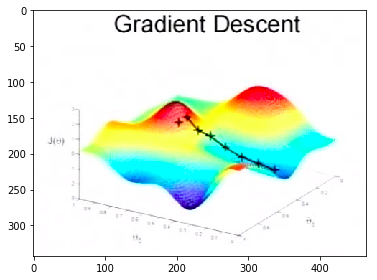

In [4]:
from skimage import io
img=io.imread('./gradient.png')
io.imshow(img)

　　下面对于目标函数$J(\theta)$求偏导数:

$$\frac{\partial}{\partial \theta_j}J(\theta)=\frac{\partial}{\partial\theta_j} \frac{1}{2}(h_{\theta}(x)-y)^2$$

$$=(h_{\theta}(x) - y)x_j$$

　　下面是更新的过程,也就是$\theta_i$会向这梯度最小的方向进行减少.$\theta$表示更新之前的值,$\alpha$表示步长,也就是每次按照梯度减少的方向变化多少,由于求的极小值,因此梯度方向是偏导数的反方向,结果为:

$$\theta := \theta_j + \alpha(h_{\theta}(x) - y)x_j$$

　　一个很重要的地方值得注意的是,梯度是有方向的,对于一个向量$\theta$,每一维分量$\theta_i$都可以求出一个梯度方向,我们就可以找到一个整体的方向,在变化的时候,我们就朝着下降最多的方向进行变化就可以达到一个最小点,不管它是全局的还是局部的.

#### 3.2.1 批量梯度下降法 (BGD)

$Repeat\ until\ convergence\ \{$
$$\theta_j := \theta_j + \alpha \sum_{i=1}^m(y^{(i)} - h_{\theta}(x^{(i)}))x_j^{(i)}$$
$\}$

　　可以看出,参数$\theta$的值每更新一次都要遍历样本集中的所有的样本,得到的新$\theta_j$,看是否满足阈值要求,若满足,则迭代结束,根据此值就可以得到;否则继续迭代.注意到,虽然梯度下降法易受到极小值的影响,但是一般的线性规则问题只有一个极小值,所以梯度下降法一般可以收敛到全局的最小值.

#### 3.2.2 随机梯度下降法 (SGD)

$Loop \{$  

　　$for\ i=0\ to\ m\ ,\{$
$$\theta_j := \theta_j + \alpha \sum_{i=1}^m(y^{(i)} - h_{\theta}(x^{(i)}))x_j^{(i)}$$
　　$\}$  
  
$\}$

　　在这个算法中,我们每次更新只用到一个训练样本,得到一个解,有新样本进来之后,在此基础上继续迭代,又得到一组新的和,以此类推.

　　批量梯度下降法,每更新一次,需要用到样本集中的所有样本;随机梯度下降法,每更新一次,只用到训练集中的一个训练样本,所以一般来说,随机梯度下降法能更快地使目标函数达到最小值(新样本的加入,随机梯度下降法有可能会使目标函数突然变大,迭代过程中再变小).所以是在全局最小附近徘徊,但对于实际应用来说,误差完全能满足要求).另外,对于批量梯度下降法,如果样本集增加了一些训练样本,就要重新开始迭代.由于以上原因,当训练样本集较大时,一般使用随机梯度下降法.